## Importing Images

In [1]:
from skimage import data, color
import matplotlib.pyplot as plt
import seaborn as sns 

# Color Setting
color_pal = sns.color_palette()
plt.style.use('seaborn')



rocket = data.rocket()
display(rocket.shape)

# Turning into gray
gray_rocket = color.rgb2gray(rocket)

display(gray_rocket.shape)

(427, 640, 3)

(427, 640)

### Defining Functions for displaying Images

In [4]:
def show_image(image, title='Image', color_map_type='gray'):
    plt.imshow(image, cmap=color_map_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

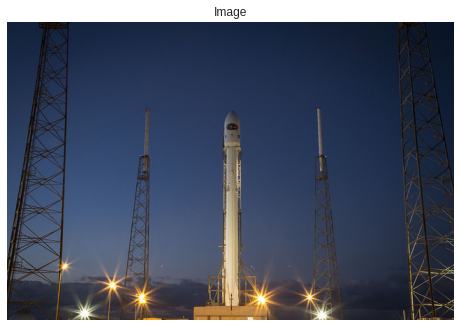

In [5]:
show_image(rocket)

## Using Numpy

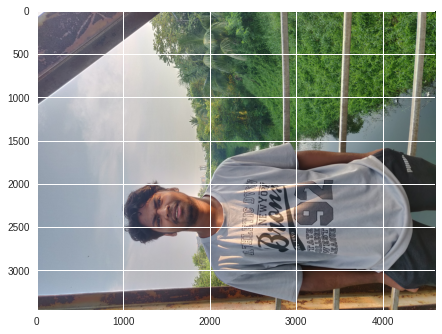

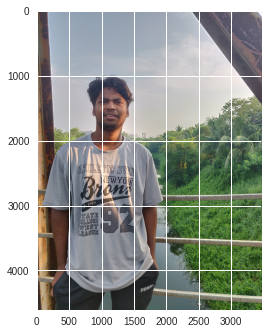

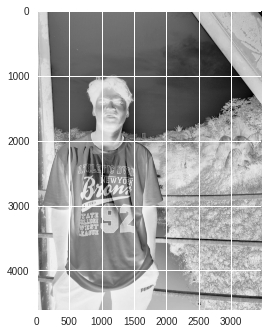

In [6]:
import numpy as np

# Reading image
me = plt.imread('me.jpg')
plt.imshow(me)
plt.show()

# Currecting the Rotation
me = np.rot90(me, 3)

# Original Me
plt.imshow(me)
plt.show()
# Here me after rgb to gray
me_in_gray = color.rgb2gray(me)
# print(read_img.shape)

# Converting into grayscale
# sweet_gray = color.rgb2gray(read_img)
plt.imshow(me_in_gray)
plt.show()


### Editing a certain part of Image

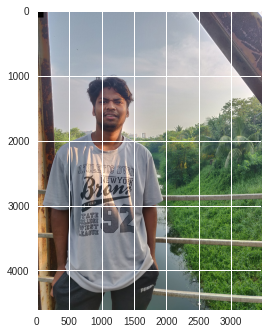

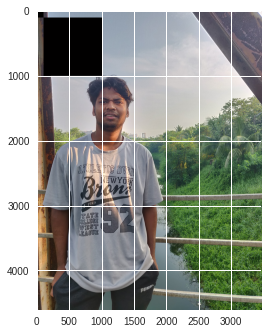

In [16]:
plt.imshow(me)
plt.show()

# Creaing a Block
melo = me

melo[100:1000, 100:1000, 0] = 1
melo[100:1000, 100:1000, 1] = 0
melo[100:1000, 100:1000, 2] = 0

plt.imshow(melo)
plt.show()

### Changing color

In [5]:
red = me[:, :, 0]
green = me[:, :, 1]
blue = me[:, :, 2]

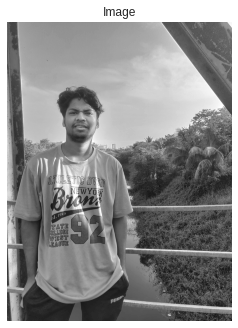

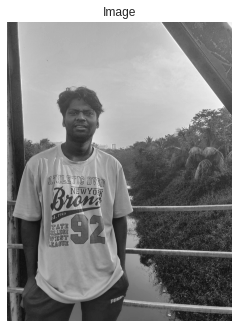

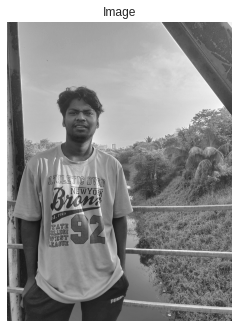

In [6]:
for i in [red, blue, green]:
    show_image(i)

### Flipping the image

(4608, 3456, 3)


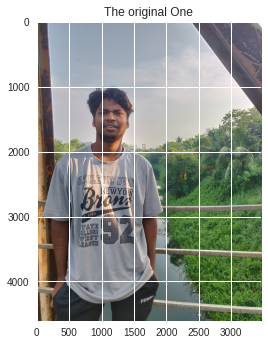

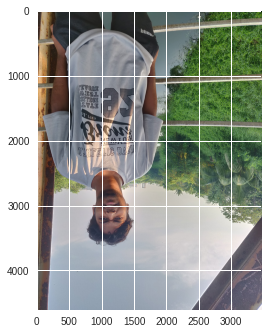

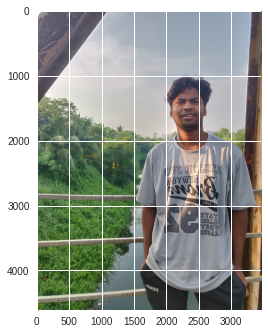

In [7]:
right_flip_v = np.flipud(me) # for up/down or Vertically flip
right_flip_h = np.fliplr(me) # for left/right Horizontally

plt.imshow(me)
plt.title('The original One')
print(me.shape)
plt.show()

for i in [right_flip_v, right_flip_h]:
    plt.imshow(i)
    plt.show()

### Histogram, A great Option

#### In gray scale image a Histogram can be use to calculate **wight/black** level **from (0-255)**.

#### Extracting information from images is a fundamental part of image enhancement.

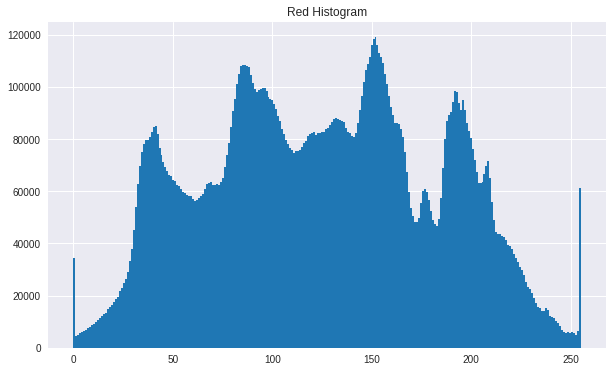

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Obtain the red channel
red_channel = me[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(),# Return a contiguous flattened array. Like: if a= [[1, 2], [3, 4]] Then a.ravel() = [1, 2, 3, 4]
                             # A 1-D array, containing the elements of the input, is returned
         bins=256,
         color=color_pal[0]) 

# Set title and show
plt.title('Red Histogram')
plt.show()

## Thresholding

>#### Thresholding is **used to partition the background and foreground** of grayscale images, by essentially making them black and white. 
#### Thresholding let us isolate elements and is used in 
#### 1. object detection,
#### 2. facial recognition,
#### 3. And others.

### Process

>#### **It works best in high-contrast grayscale images.**
#### To threshold color images, 
#### 1. we must first convert them to grayscale.
#### 2. Then set the threshold value.

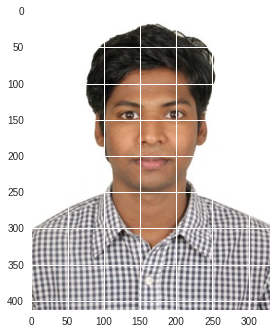

In [9]:
# Reading the Image
me_again = plt.imread('Amirul_Islam.jpg')
plt.imshow(me_again)
plt.show()

In [10]:
# Convert rgb2gray Scale
me_again_gray = color.rgb2gray(me_again)


### Global Threshold

0.6860091398590686


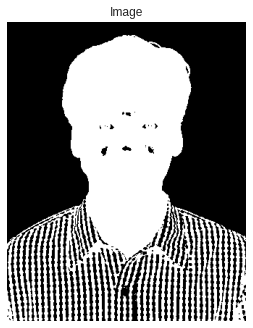

In [11]:
from skimage.filters import threshold_otsu

# optinal threshold
thresh = threshold_otsu(me_again_gray)
print(thresh)

# Identify the background
back = thresh > me_again_gray

show_image(back)

### Local/Adaptive threshold (Best for **multi-color background**)

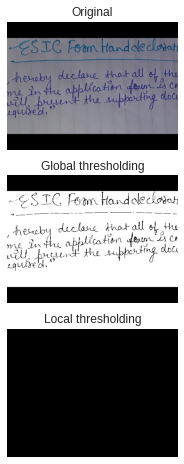

In [12]:
from skimage.filters import threshold_local, try_all_threshold, threshold_otsu

# Reading the Image
hand_written = plt.imread('hand_writing.jpg')

# Convert rgb2gray Scale
hand_written_gray = color.rgb2gray(hand_written)
# show_image(hand_written_gray)



# Global way
thresh_glo = threshold_otsu(hand_written_gray)
back_glo = hand_written_gray > thresh_glo



# Local way
# Assigning Thresh
block_size = 35

# Obtain the optimal local threshold
local_thresh = threshold_local(hand_written_gray, block_size, offset= 10) # the offset=10 for Subtracting from mean
                                                                          # to achive optinal threshold

# Appling the thresh
back_loc = local_thresh > hand_written_gray


# Finding the best fit
# fig, ax = try_all_threshold(hand_written_gray, verbose=False)
# print(local_thresh)

# plot Designing
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()



ax[0].imshow(hand_written)
ax[0].set_title('Original')

ax[1].imshow(back_glo)
ax[1].set_title('Global thresholding')

ax[2].imshow(back_loc)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()


### Trying All Algorithms

#### The idea is to find the best one (can be local or global)

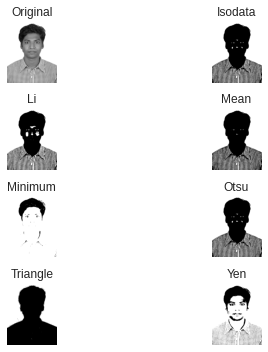

In [13]:
def best_one(image):
#     import library
    from skimage.filters import  try_all_threshold
    from skimage.color import rgb2gray
    
    if image.ndim == 3:
#       Converting to gray Scale
        image_gray = rgb2gray(image)
    
#       obtain all thresholds
        fig, ax = try_all_threshold(image_gray, verbose=False)
#         plt.show(fig, ax)
    elif image.ndim == 2:
#       obtain all thresholds
        fig, ax = try_all_threshold(image, verbose=False)
#         plt.show(fig, ax)
    else:
        print('image is not in right shape')
    return 

best_one(me_again)



## **Filtering**

#### Filtering is a technique for modifying or enhancing an image.
#### It can be used to emphasize or remove certain features, like edges. Smoothing, sharpening and edge detection.

## Finding the **Edge**.

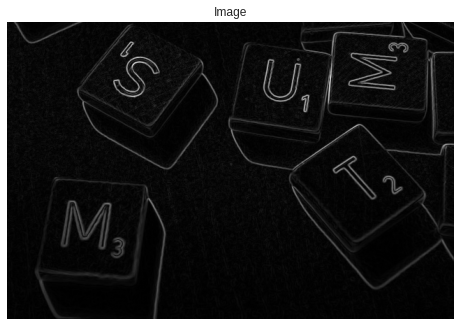

In [14]:
from skimage.filters import sobel
from skimage.color import rgb2gray

random = plt.imread('random.jpg')

to_rgb = rgb2gray(random)

edge = sobel(to_rgb)

show_image(edge)

### Blurring/ **Noise Reduction**
>#### **Set the multichannel=True if the image is colored.**

/tmp/ipykernel_8115/1234647305.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurrly = gaussian(to_rgb, multichannel=True)


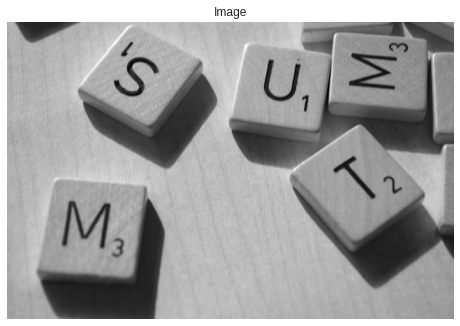

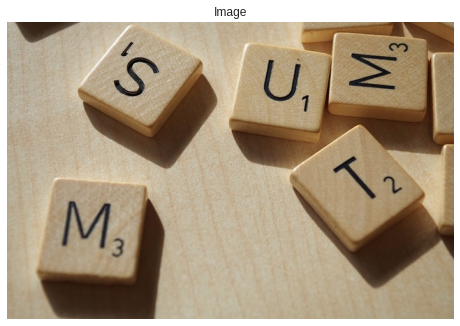

In [54]:
from skimage.filters import gaussian

# to_rgb = rgb2gray(random)
blurrly = gaussian(to_rgb, multichannel=True)
show_image(blurrly)
show_image(random)

### **Edge Detection**
#### The Canny Detection one of the most used function fro edge detection.
>### Steps:
#### 1. a Gray scale image.
#### 2. Add gaussian if it's needed.
#### 3. apply to the canny function.

/tmp/ipykernel_8115/3254263133.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurrly = gaussian(to_rgb, multichannel=True)


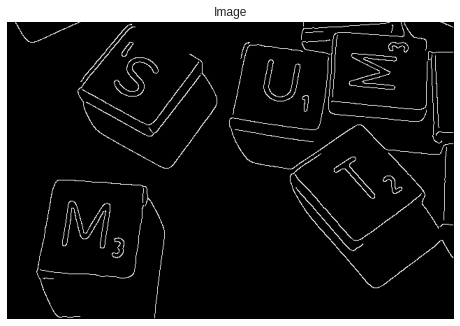

In [16]:
from skimage.feature import canny

# Using gaussian() to remove noice
blurrly = gaussian(to_rgb, multichannel=True)

# Detecting Edge
edge_d = canny(blurrly, sigma=2) # the lower value of sigma the less effect of gaussian effect on the image Default=1
show_image(edge_d)

### Difference between Edge detector **canny** and **sobel** method.

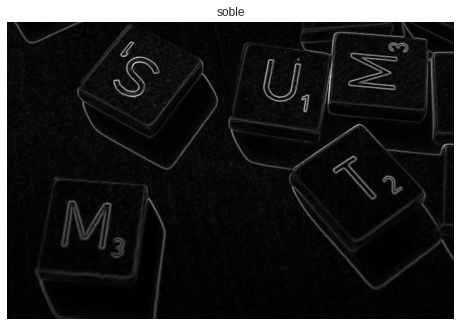

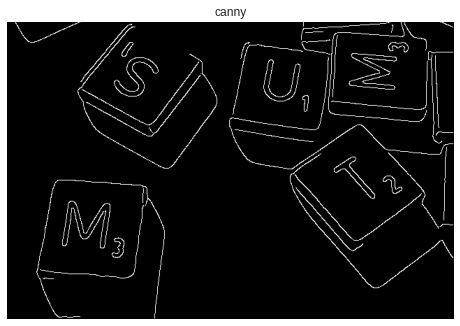

In [17]:
show_image(edge, 'soble')
show_image(edge_d, 'canny')

## **Corner Detection**
>### Steps:
#### 1. gray scale image
#### 2. Point of interest
#### 3. corner_harris function

>### Define a function for Showing Corners

In [18]:
def show_corners(image, corners, title='Detected Corners'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(corners[:, 1], corners[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

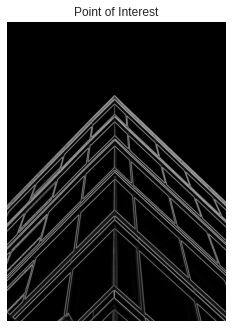

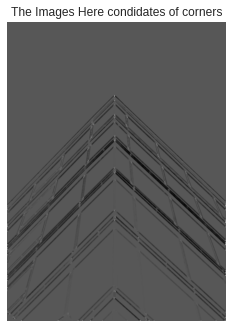

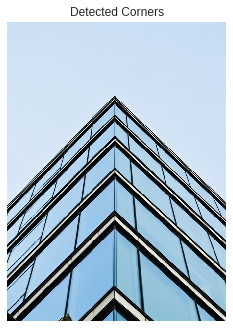

In [19]:
# Reading image
corner = plt.imread('Image Processing with Python course exercise dataset/chapter 4/corners_building_top.jpg')

# to gray scale
to_gray = rgb2gray(corner)

from skimage.feature import corner_harris, corner_peaks

# Point of interest with sobel
# from skimage.filters import sobel
poin_of_in = sobel(to_gray)
show_image(poin_of_in, 'Point of Interest')

# corner Detect
corners = corner_harris(poin_of_in)


# This image show's here (Posible Point of Interest corners) of corners candidates
show_image(corners, 'The Images Here condidates of corners')

corner_p = corner_peaks(corners, min_distance=10)
# print(len(corner_p))


show_corners(corner, corner_p)

### Image Enhancement

>#### **When the Histogram of an Image is**
##### 1. **Skewed left** (the Image most black pixel)
##### 2. **Skewed Right** (Image most composed with White pixel)
##### 3. **Skewed Middle**(Image color is Grayish)


### Enhance Contrast

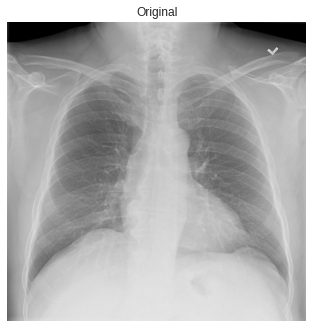

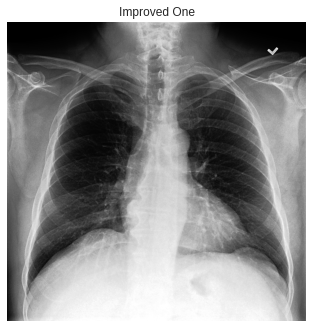

In [20]:
# Library for Enchance Contrast
from skimage import exposure

xray = plt.imread('Image Processing with Python course exercise dataset/chapter 2/chest_xray_image.png')

# improvimg
improved_xray = exposure.equalize_hist(xray)

show_image(xray, 'Original')
show_image(improved_xray, 'Improved One')


### Further  Enhancement

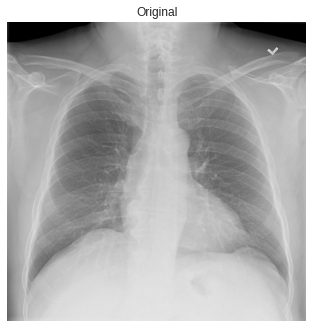

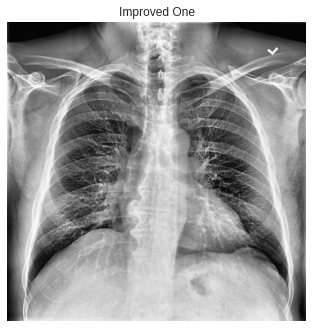

In [21]:
further_improved = exposure.equalize_adapthist(xray, clip_limit=0.03)

show_image(xray, 'Original')
show_image(further_improved, 'Improved One')

### Aliasing, Rotating and Rescaling

#### Aliasing is an effect that causes different signals

/tmp/ipykernel_8115/118184191.py:7: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  rescaled_cat = rescale(random_cat, 1/8, anti_aliasing=True, multichannel=True)


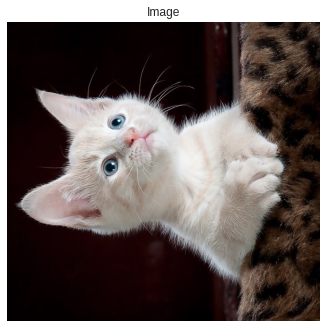

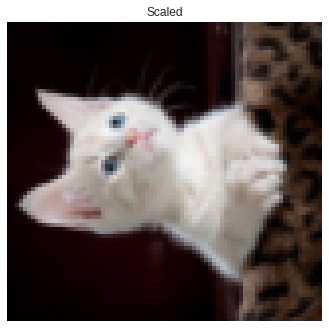

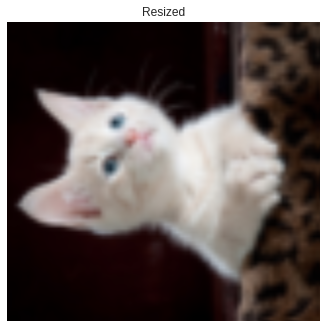

In [22]:
from skimage.transform import rescale, resize

# Reading image
random_cat = plt.imread('Image Processing with Python course exercise dataset/chapter 2/image_cat.jpg')

# Rescaling
rescaled_cat = rescale(random_cat, 1/8, anti_aliasing=True, multichannel=True)

# Rsizeing
resized_cat = resize(rescaled_cat, (random_cat.shape[0]/2, random_cat.shape[1]/2), anti_aliasing=True)

# Showing
show_image(random_cat)
show_image(rescaled_cat, 'Scaled')
show_image(resized_cat, 'Resized')


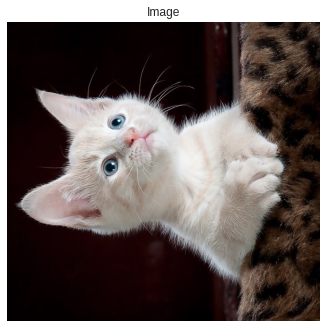

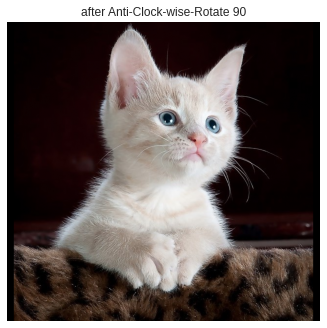

In [23]:
from skimage.transform import rotate

# Rotating image
rotate_cat = rotate(random_cat, -90)

show_image(random_cat)
show_image(rotate_cat, 'after Anti-Clock-wise-Rotate 90')

### **Morphology**

#### Binary regions produced by simple thresholding can be distorted by noise and texture, as we can see in the image.
#### Morphological filtering operations try to remove these imperfections by accounting for the form and structure of the objects in the image. 
>#### **Basic morphological operations are dilation and erosion.**
#### **Dilation** adds pixels to the boundaries of objects in an image.
####  **Erosion** removes pixels on object boundaries.
>#### **Structuring Element** The Number of pixels added or removed from the object in an image depends on the size, **shape** of the Structuring Element used to process the image.
![Structuring E](imageNotes/se.png)

#### The structuring element is a small binary image used to probe the input image.
### **Probe**(Examine the Pixel)

![probs](imageNotes/main-qimg-17cd47a61fa2e0472d569040aacdf2fc.webp)

#### Think of the anchor **(shape of above image like a anchor)** as the gallery and the **positive and negative samples** as the ***Probes* (Exam Tools).**

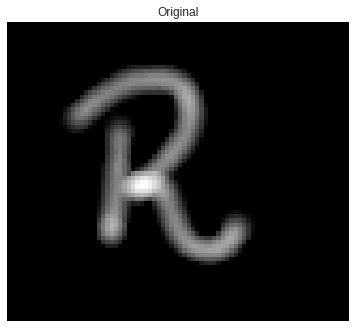

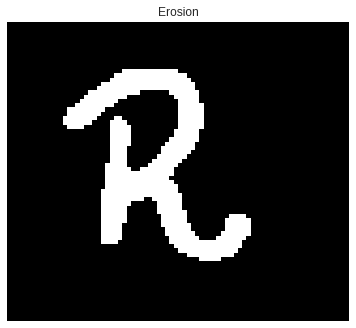

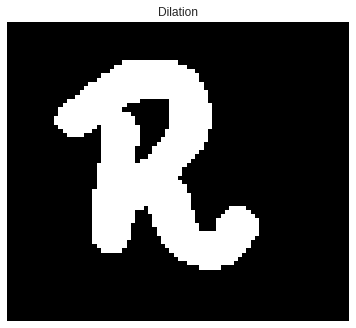

In [24]:
# Reading r
r = plt.imread('Image Processing with Python course exercise dataset/chapter 2/r5.png')   

# In gray Scale
r = rgb2gray(r)           

# Importing libray
from skimage import morphology

# Erosion
erosion = morphology.binary_erosion(r)

# Dilation
dilation = morphology.binary_dilation(r)

# Showing Image
show_image(r, 'Original')
show_image(erosion, 'Erosion')
show_image(dilation, 'Dilation')



## Restoring Images

### Inpainting 

In [53]:
from skimage.restoration import inpaint
inpaint.
# Reading image
damaged_image = plt.imread('damaged.jpg')

# Creating mask
# mask = get


### Noise

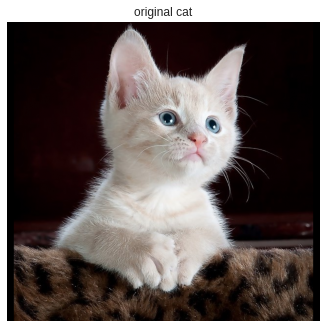

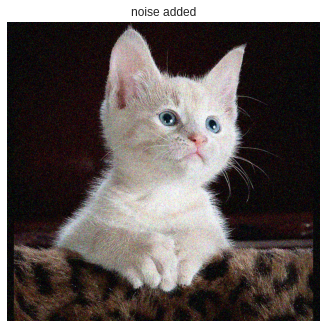

In [64]:
from skimage.util import random_noise

noise_added = random_noise(rotate_cat)

show_image(rotate_cat, 'original cat')
show_image(noise_added, 'noise added')


### Removing noise

In [ ]:
from skimage.restoration import denoise_tv_bregman

# removde
remove_noise = denoise_tv_bregman(noise_added, weigth=0.1, multichannel=True)

show_image(remove_noise)

# Using Tensorflow

In [33]:
import tensorflow as tf

In [30]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  1


In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1770744218628320061
xla_global_id: -1
]


2022-10-07 01:54:06.973561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[ 97 163]
 [112 176]], shape=(2, 2), dtype=int32)


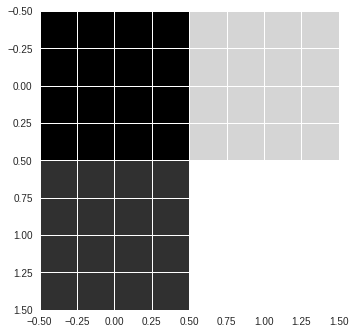

tf.Tensor(
[[ 97]
 [163]
 [112]
 [176]], shape=(4, 1), dtype=int32)


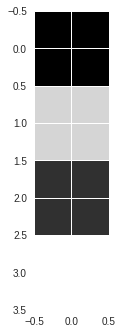

In [45]:
# generating gray scale image
gray = tf.random.uniform([2, 2], maxval=255, dtype='int32')
print(gray)
plt.imshow(gray)
plt.show()

# Reshaping gray Scale
gray = tf.reshape(gray, [2*2, 1])
print(gray)
plt.imshow(gray)
plt.show()

tf.Tensor(
[[[111 109  17]
  [ 13  11  35]]

 [[113 248 159]
  [114 203 117]]], shape=(2, 2, 3), dtype=int32)


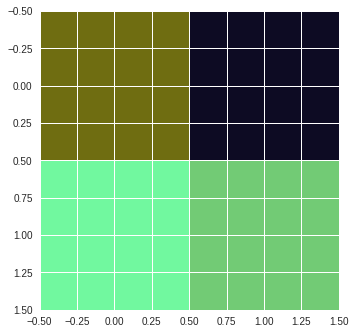

tf.Tensor(
[[111 109  17]
 [ 13  11  35]
 [113 248 159]
 [114 203 117]], shape=(4, 3), dtype=int32)


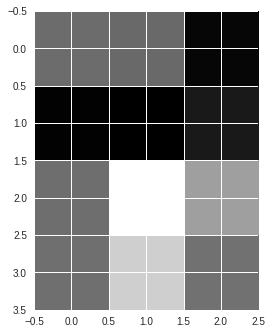

In [46]:
gray = tf.random.uniform([2, 2, 3], maxval=255, dtype='int32')
print(gray)
plt.imshow(gray)
plt.show()

# Reshaping gray Scale
gray = tf.reshape(gray, [2*2, 3])
print(gray)
plt.imshow(gray)
plt.show()